Assignment 3

Implementing a Convolutional Neural Network (CNNs) for demonstrating multiclass classification by classifying the fashion clothing into different classes by using Fashion-MNIST dataset.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [2]:
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

#reshaping the input tensor because the mnist input tensor consists of a (28,28,1) grayscale image, but Conv2D requires a 4D tensor.
xtrain = xtrain.reshape(-1,28,28,1).astype('float32') / 255.0
xtest = xtest.reshape(-1,28,28,1).astype('float32') / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
model = Sequential()

In [4]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation="softmax"))  

c:\Users\anime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [7]:
model.fit(xtrain.astype(np.float32), ytrain.astype(np.float32), epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8116 - loss: 0.5311 - val_accuracy: 0.8913 - val_loss: 0.3048
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8985 - loss: 0.2752 - val_accuracy: 0.9013 - val_loss: 0.2719
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9206 - loss: 0.2183 - val_accuracy: 0.9043 - val_loss: 0.2669
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9324 - loss: 0.1808 - val_accuracy: 0.9121 - val_loss: 0.2545
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9438 - loss: 0.1485 - val_accuracy: 0.9115 - val_loss: 0.2634


In [8]:
loss, accuracy = model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9063 - loss: 0.2800


In [9]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']
predictions = model.predict(xtest[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [10]:
label = labels[np.argmax(predictions)]

ankle_boots


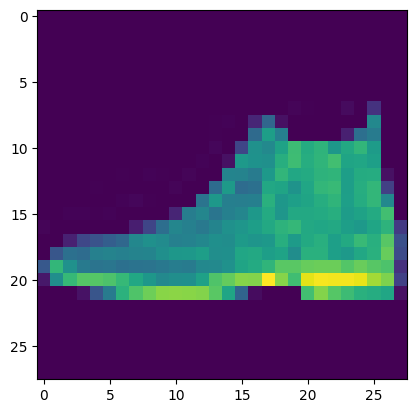

In [11]:
print(label)
plt.imshow(xtest[:1][0])
plt.show()

In [20]:
probability_model = Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predictions[0]

In [ ]:
np.argmax(predictions[0])

In [21]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])  

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}%({})".format(labels[predicted_label], 100*np.max(predictions_array), labels[true_label]), color = color)

In [22]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

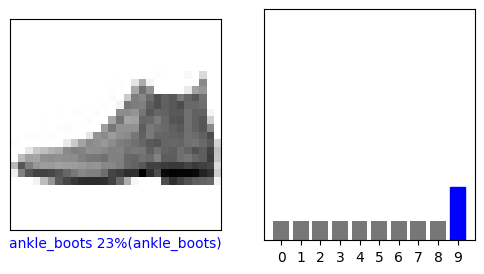

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], ytest)
plt.show()